# EXTRACTING COLORS FROM IMAGES

In [97]:
from colorthief import ColorThief
import colorgram
import pandas as pd
import numpy as np
import glob
import ast
from statistics import mean
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
communities = ["University of Tennessee at Knoxville",
               "UTK Geography",
               "Tennessee",
               "Knox County",
               "Downtown Knoxville",
               "Outdoors",
               "Nourish Knoxville",
               "Sunrise Supermarket",
               "Religion",
               "Knoxville Police"]

filenames = ["utknoxville",
             "utkgeography",
             "tennessee",
             "knoxcounty",
             "downtownknoxville",
             "outdoors",
             "nourishknoxville",
             "sunrisesupermarket",
             "religion",
             "knoxvillepolice"]

# Initialize data-frame for average color palette
color_Average = pd.DataFrame(columns = ["Image", "Color1", "Color2", "Color3", "Color4", "Color5", "HSL1", "HSL2", "HSL3", "HSL4", "HSL5", "Proportion1", "Proportion2", "Proportion3", "Proportion4", "Proportion5"])

# Initialize data-frame for the color palette of each image
color_Holder = pd.DataFrame(columns = ["Image", "Color1", "Color2", "Color3", "Color4", "Color5", "HSL1", "HSL2", "HSL3", "HSL4", "HSL5", "Proportion1", "Proportion2", "Proportion3", "Proportion4", "Proportion5"])

In [76]:
# COLORGRAM

# Initialize data-frame for the color palette of each image
color_Holder = pd.DataFrame(columns = ["Image", "Color1", "Color2", "Color3", "Color4", "Color5", "HSL1", "HSL2", "HSL3", "HSL4", "HSL5", "Proportion1", "Proportion2", "Proportion3", "Proportion4", "Proportion5"])

for i in range(len(filenames)):
    # Retrieve all paths of jpegs in a directory
    pathlist = Path("./Instagram/{}".format(filenames[i])).glob('**/*.jpg')
    
    # Extract a color palette for each image
    for path in pathlist:
        colors = colorgram.extract(path, 5)
        if len(colors) == 5:
            color_Holder = color_Holder.append(pd.Series([str(path),
                                                          colors[0].rgb, colors[1].rgb, colors[2].rgb, colors[3].rgb, colors[4].rgb, 
                                                          colors[0].hsl, colors[1].hsl, colors[2].hsl, colors[3].hsl, colors[4].hsl,
                                                          colors[0].proportion, colors[1].proportion, colors[2].proportion, colors[3].proportion, colors[4].proportion],
                                                          index=color_Holder.columns), ignore_index = True)
        if len(colors) == 4:
            color_Holder = color_Holder.append(pd.Series([str(path),
                                                          colors[0].rgb, colors[1].rgb, colors[2].rgb, colors[3].rgb, None, 
                                                          colors[0].hsl, colors[1].hsl, colors[2].hsl, colors[3].hsl, None,
                                                          colors[0].proportion, colors[1].proportion, colors[2].proportion, colors[3].proportion, None],
                                                          index=color_Holder.columns), ignore_index = True)
        if len(colors) == 3:
            color_Holder = color_Holder.append(pd.Series([str(path),
                                                          colors[0].rgb, colors[1].rgb, colors[2].rgb, None, None, 
                                                          colors[0].hsl, colors[1].hsl, colors[2].hsl, None, None,
                                                          colors[0].proportion, colors[1].proportion, colors[2].proportion, None, None],
                                                          index=color_Holder.columns), ignore_index = True)
        if len(colors) == 2:
            color_Holder = color_Holder.append(pd.Series([str(path),
                                                          colors[0].rgb, colors[1].rgb, None, None, None, 
                                                          colors[0].hsl, colors[1].hsl, None, None, None,
                                                          colors[0].proportion, colors[1].proportion, None, None, None],
                                                          index=color_Holder.columns), ignore_index = True)
        if len(colors) == 1:
            color_Holder = color_Holder.append(pd.Series([str(path),
                                                          colors[0].rgb, None, None, None, None,
                                                          colors[0].hsl, None, None, None, None,
                                                          colors[0].proportion, None, None, None, None],
                                                          index=color_Holder.columns), ignore_index = True)
    
    color_Holder.to_csv("./Instagram/colors_{}.csv".format(filenames[i]))
    color_Holder = pd.DataFrame(columns = ["Image", "Color1", "Color2", "Color3", "Color4", "Color5", "HSL1", "HSL2", "HSL3", "HSL4", "HSL5", "Proportion1", "Proportion2", "Proportion3", "Proportion4", "Proportion5"])
    print(color_Holder)
#    color_Average = color_Average.append(pd.Series([
#                                                    "{}".format(communities[i]),
#                                                    tuple(map(np.median, zip(*color_Holder["Color1"]))),
#                                                    tuple(map(np.median, zip(*color_Holder["Color2"]))),
#                                                    tuple(map(np.median, zip(*color_Holder["Color3"])))],
#                                                    index = color_Average.columns),
#                                                    ignore_index = True)
#    
#    color_Average.to_csv("./Instagram/color_Median.csv")

Empty DataFrame
Columns: [Image, Color1, Color2, Color3, Color4, Color5, HSL1, HSL2, HSL3, HSL4, HSL5, Proportion1, Proportion2, Proportion3, Proportion4, Proportion5]
Index: []
Empty DataFrame
Columns: [Image, Color1, Color2, Color3, Color4, Color5, HSL1, HSL2, HSL3, HSL4, HSL5, Proportion1, Proportion2, Proportion3, Proportion4, Proportion5]
Index: []
Empty DataFrame
Columns: [Image, Color1, Color2, Color3, Color4, Color5, HSL1, HSL2, HSL3, HSL4, HSL5, Proportion1, Proportion2, Proportion3, Proportion4, Proportion5]
Index: []
Empty DataFrame
Columns: [Image, Color1, Color2, Color3, Color4, Color5, HSL1, HSL2, HSL3, HSL4, HSL5, Proportion1, Proportion2, Proportion3, Proportion4, Proportion5]
Index: []
Empty DataFrame
Columns: [Image, Color1, Color2, Color3, Color4, Color5, HSL1, HSL2, HSL3, HSL4, HSL5, Proportion1, Proportion2, Proportion3, Proportion4, Proportion5]
Index: []
Empty DataFrame
Columns: [Image, Color1, Color2, Color3, Color4, Color5, HSL1, HSL2, HSL3, HSL4, HSL5, Proport

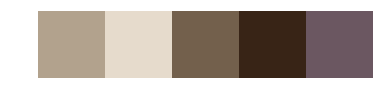

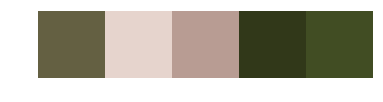

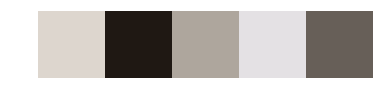

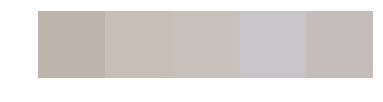

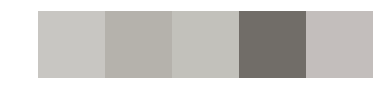

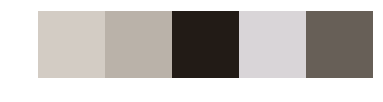

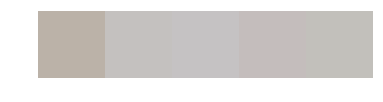

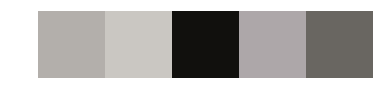

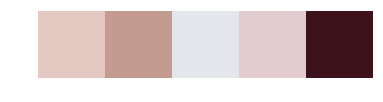

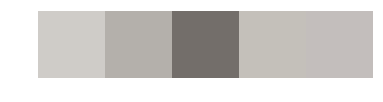

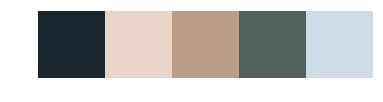

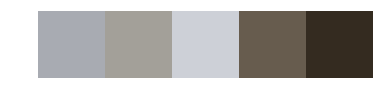

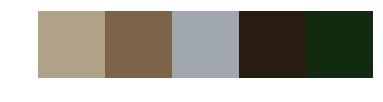

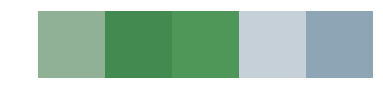

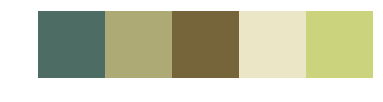

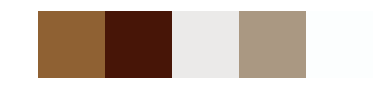

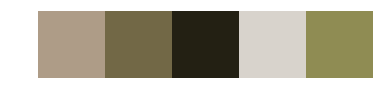

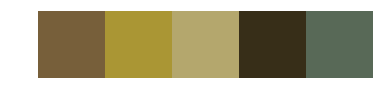

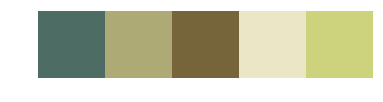

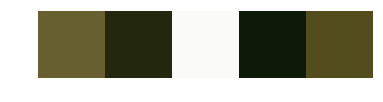

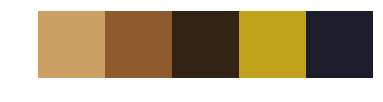

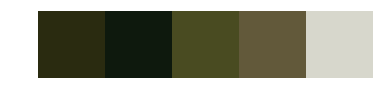

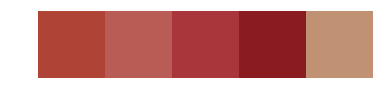

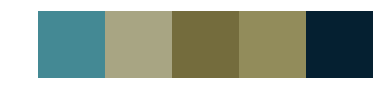

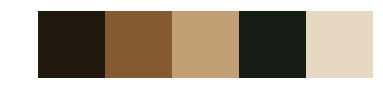

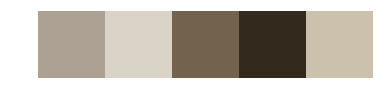

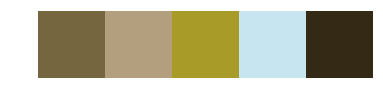

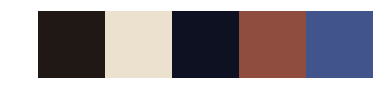

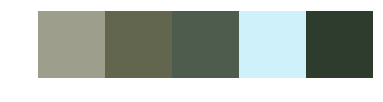

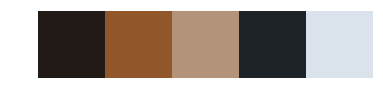

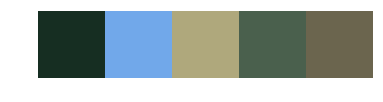

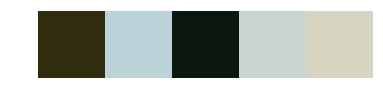

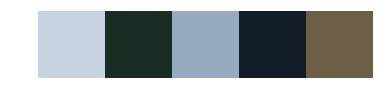

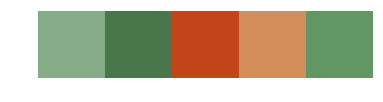

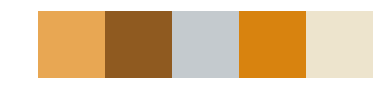

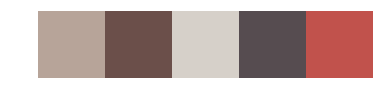

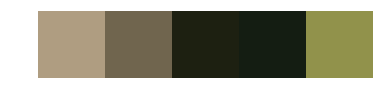

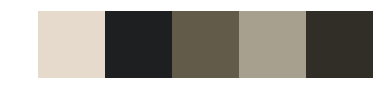

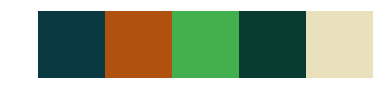

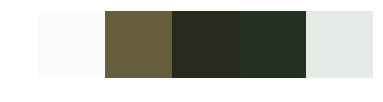

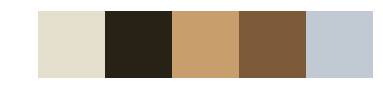

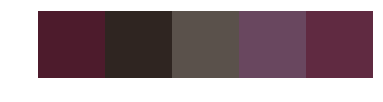

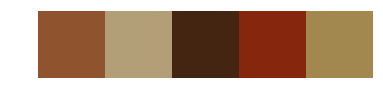

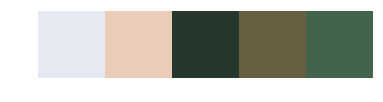

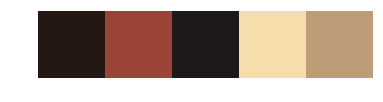

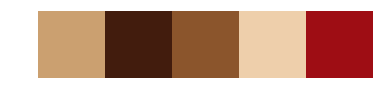

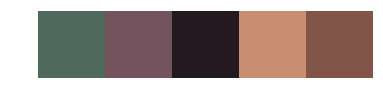

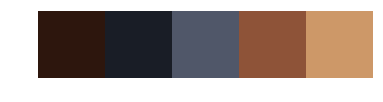

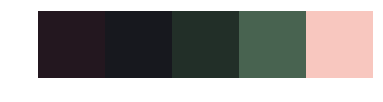

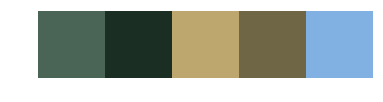

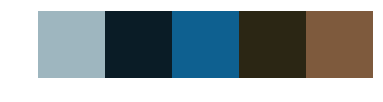

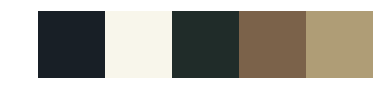

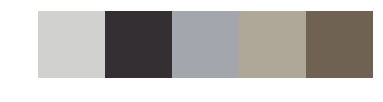

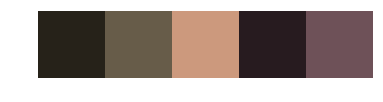

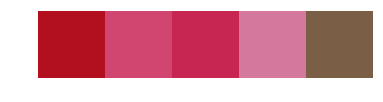

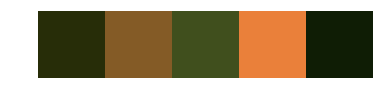

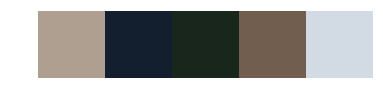

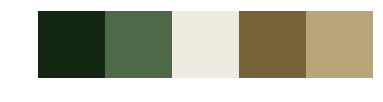

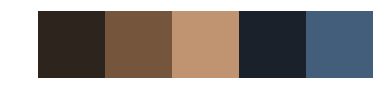

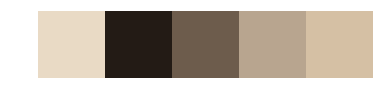

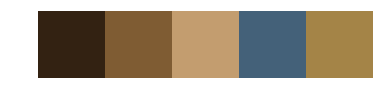

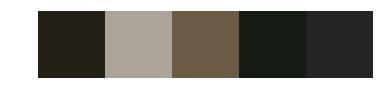

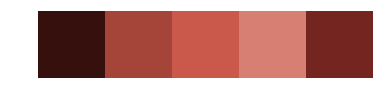

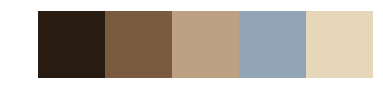

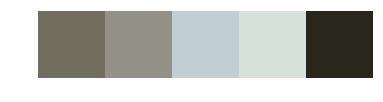

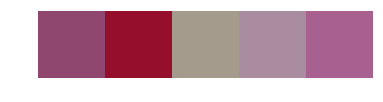

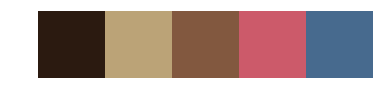

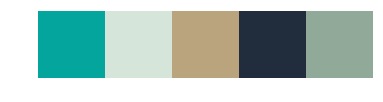

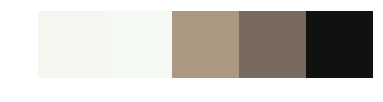

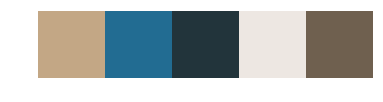

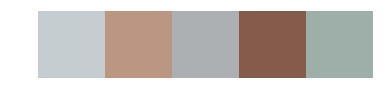

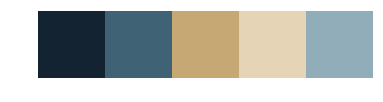

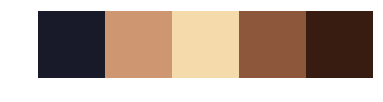

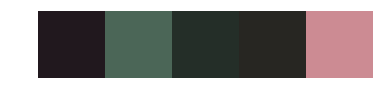

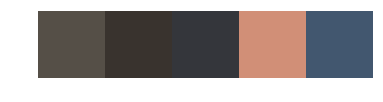

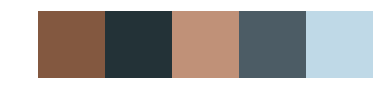

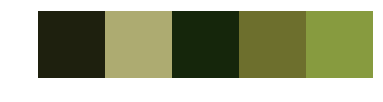

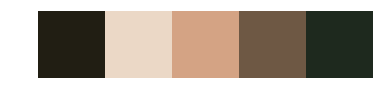

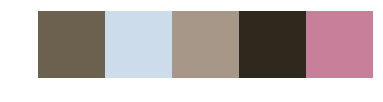

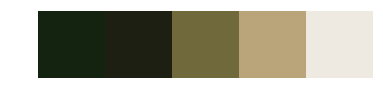

[]


In [111]:
## Building a plot of color palettes: https://stackoverflow.com/questions/51728957/create-a-color-palette-image-from-a-list-of-rgb-color#comment90419913_51729498

color_nourishknoxville = pd.read_csv("./Instagram/colors_nourishknoxville.csv", index_col = 0, converters={"Color1": ast.literal_eval,
                                                                                                 "Color2": ast.literal_eval,
                                                                                                 "Color3": ast.literal_eval,
                                                                                                 "Color4": ast.literal_eval,
                                                                                                 "Color5": ast.literal_eval,
                                                                                                 "HSL1": ast.literal_eval,
                                                                                                 "HSL2": ast.literal_eval,
                                                                                                 "HSL3": ast.literal_eval,
                                                                                                 "HSL4": ast.literal_eval,
                                                                                                 "HSL5": ast.literal_eval})
color_nourishknoxville_plt = color_nourishknoxville.loc[:, "Color1":"HSL5"]
color_nourishknoxville_plt

arrays = []
x = 0
y = 0
px = 0
py = 0
cvs = Image.new('RGB',(x*8, y*8))

for i in range(len(color_nourishknoxville_plt)):
    palette = list(color_nourishknoxville_plt.loc[i, "Color1":"Color5"])
    palette = np.array(palette)[np.newaxis, :, :]
    plt.imshow(palette.astype(np.uint8));
    plt.axis('off');
    plt.savefig("./Instagram/nourishknoxville/cpimages/cp_{}".format(i))
    #plt.show();

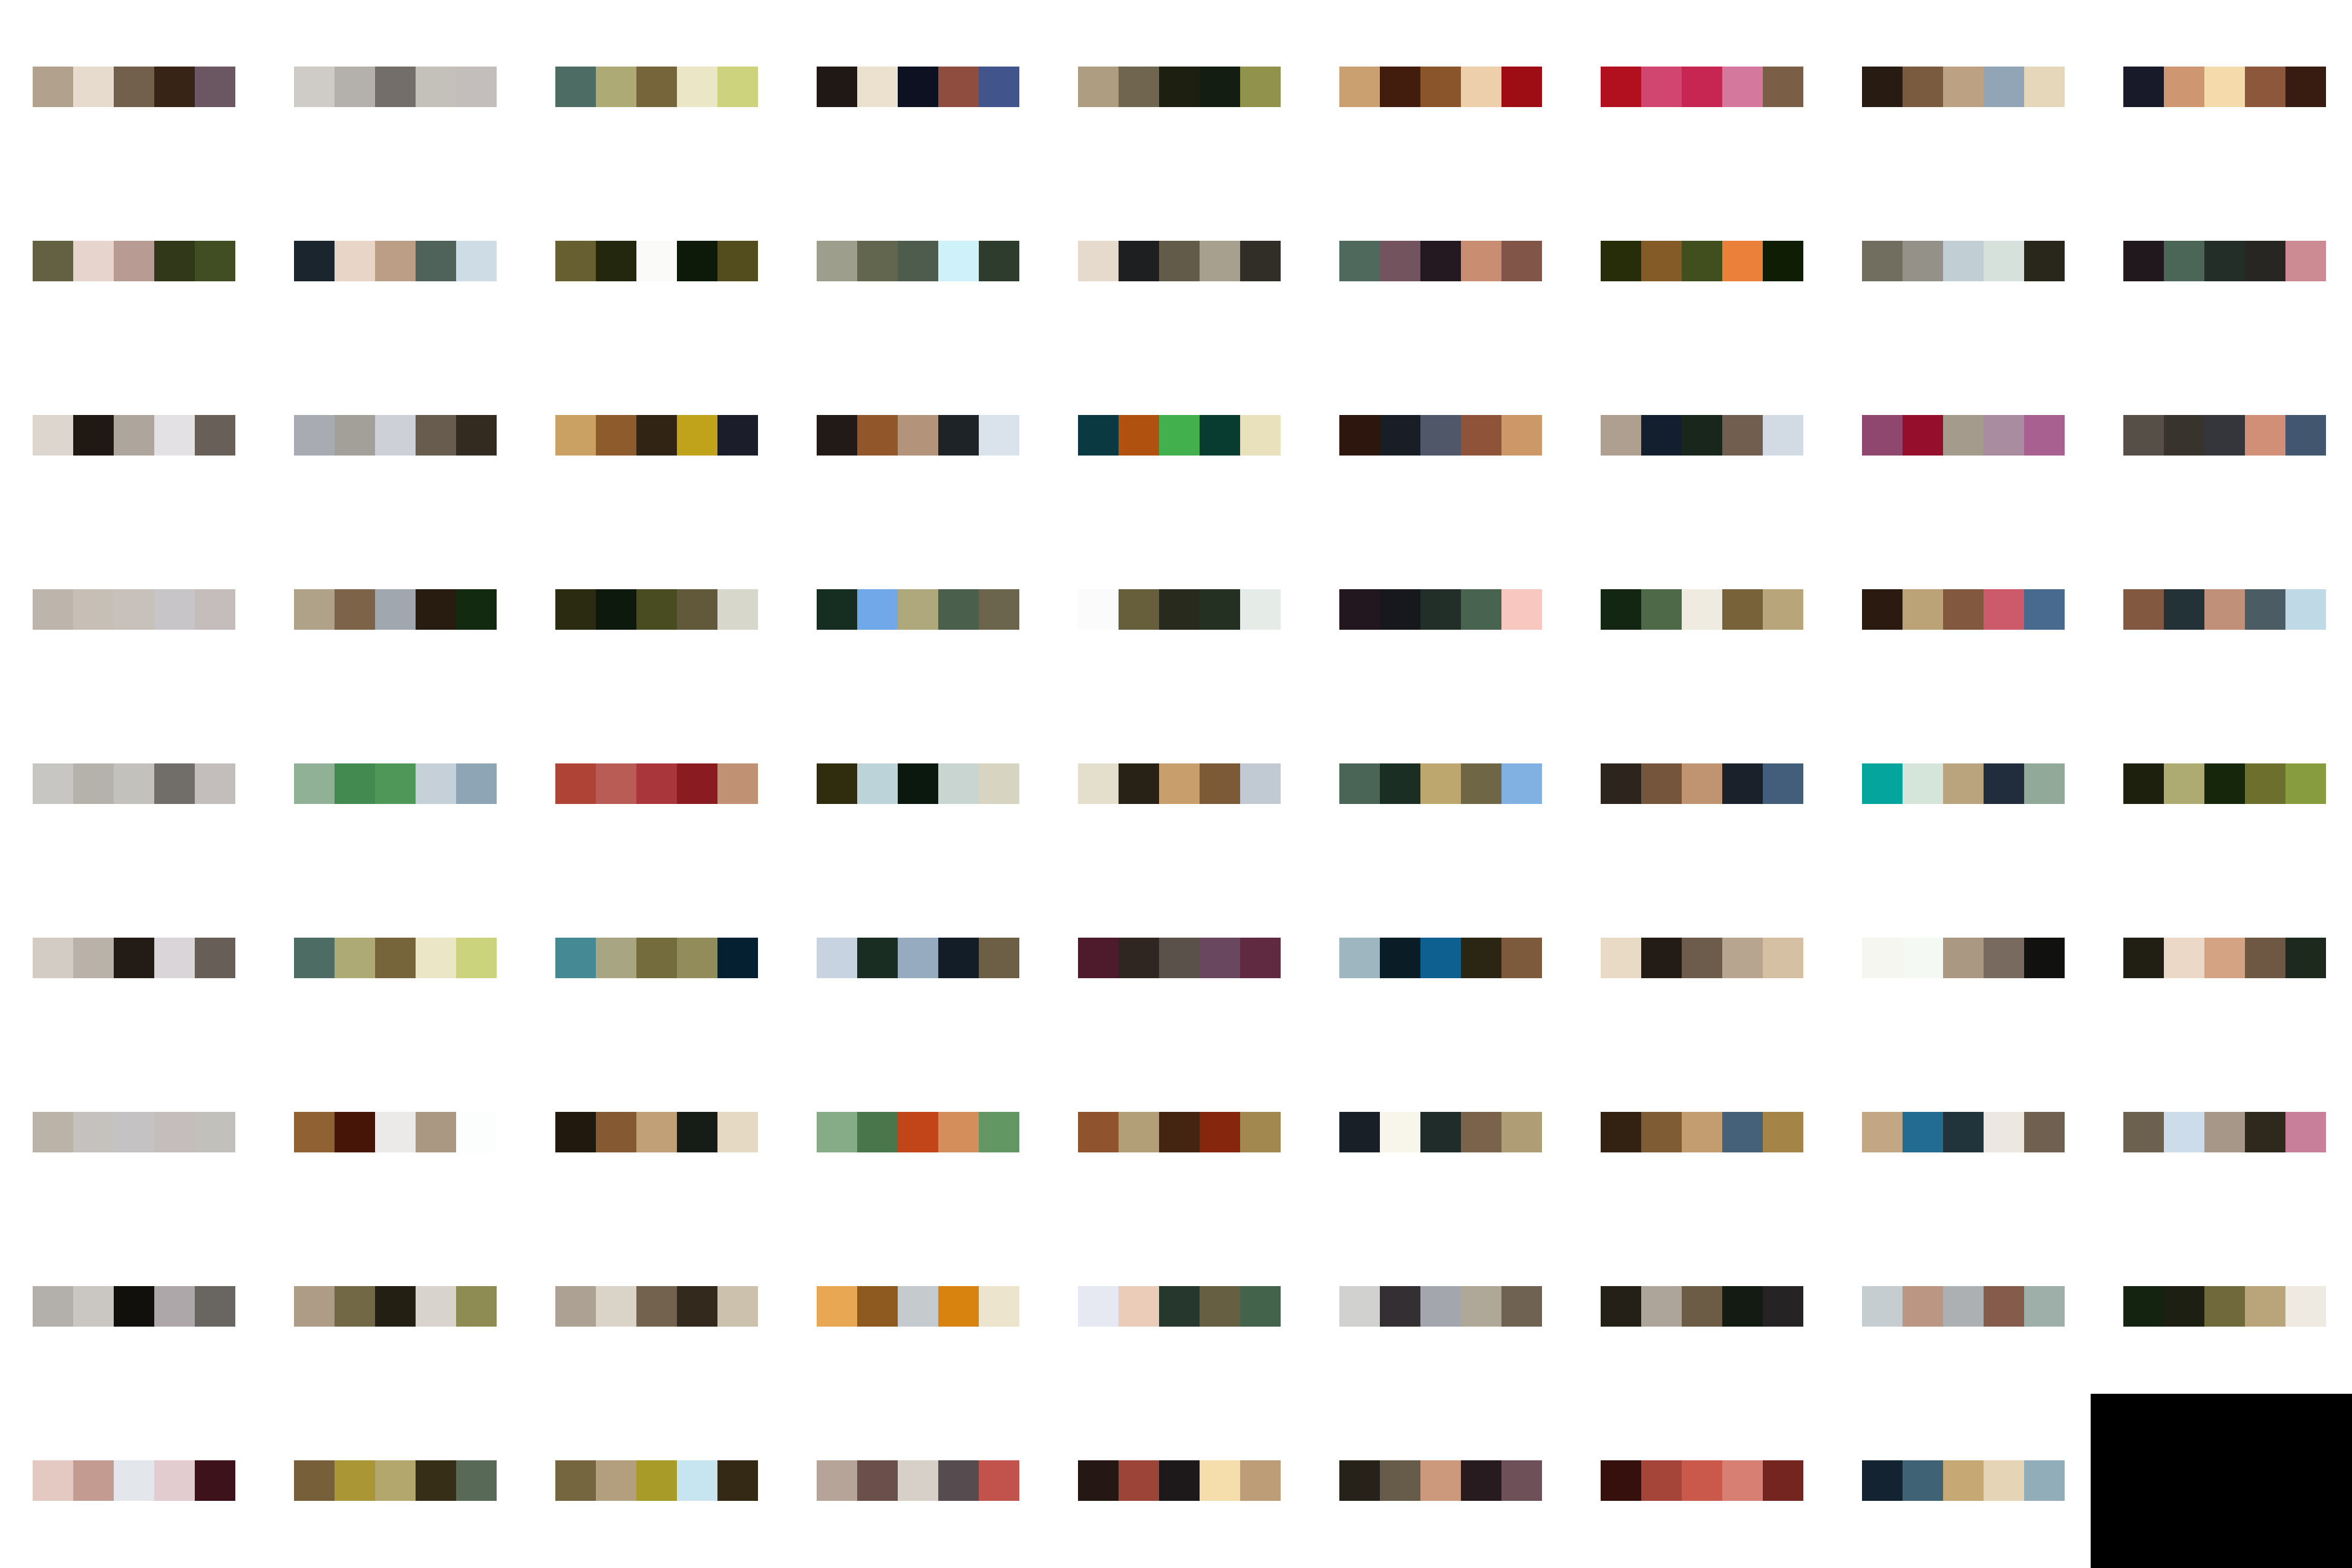

In [113]:
fs = []
for i in range(len(color_nourishknoxville_plt)):
    im = Image.open('./Instagram/nourishknoxville/cpimages/cp_{}.png'.format(i),'r')
    fs.append(im)
    
# get the image size
x,y = fs[0].size

ncol = 9
nrow = 9
cvs = Image.new('RGB',(x*ncol,y*nrow))

for i in range(len(fs)):
    px, py = x*int(i/nrow), y*(i%nrow)
    cvs.paste(fs[i],(px,py))
    
cvs

cvs.save('./Instagram/cp_nourishknoxville.png',format='png')

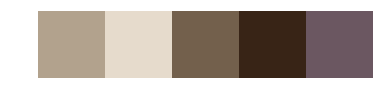

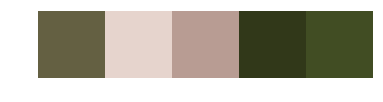

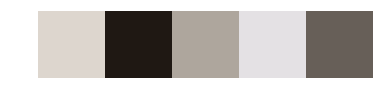

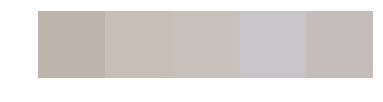

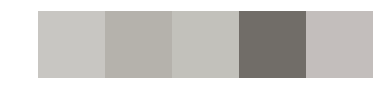

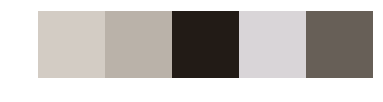

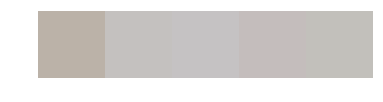

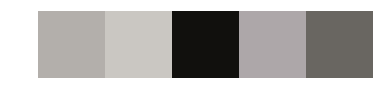

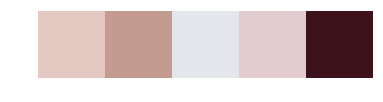

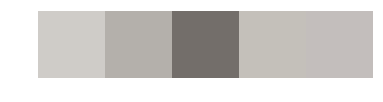

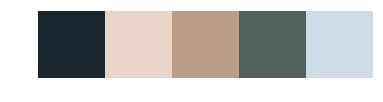

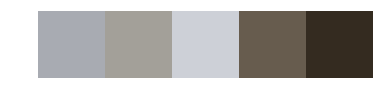

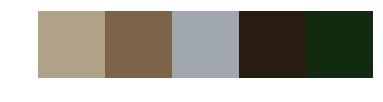

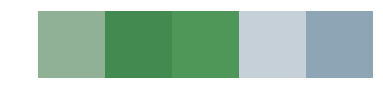

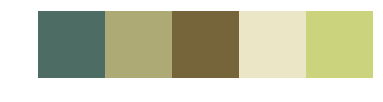

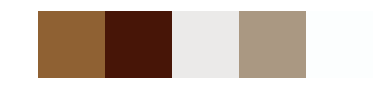

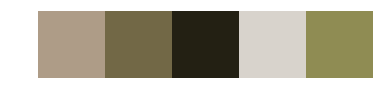

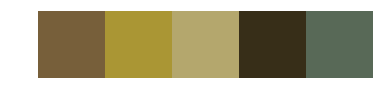

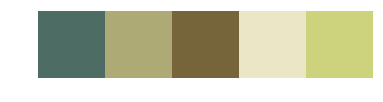

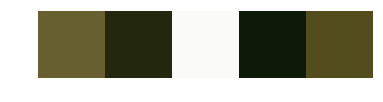

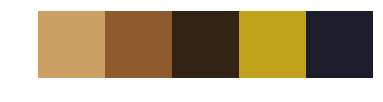

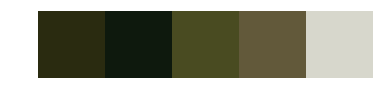

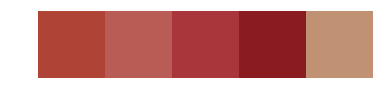

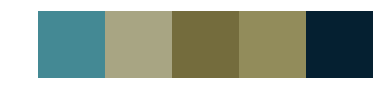

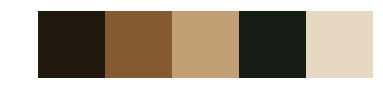

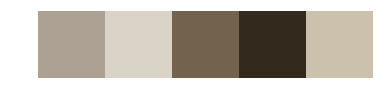

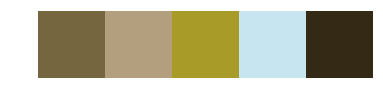

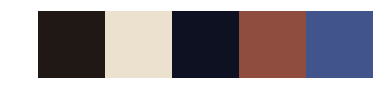

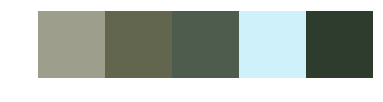

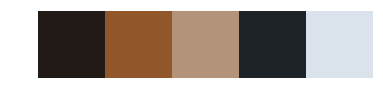

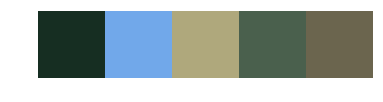

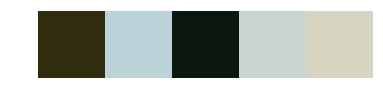

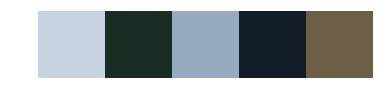

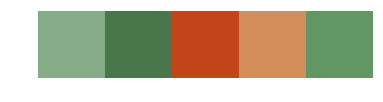

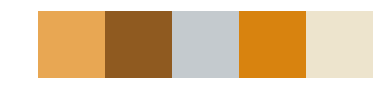

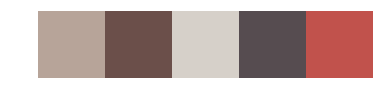

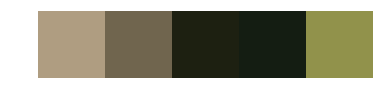

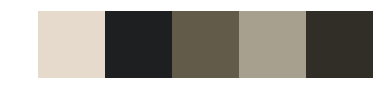

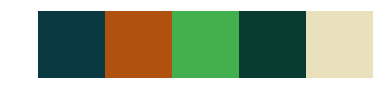

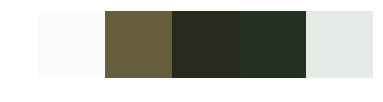

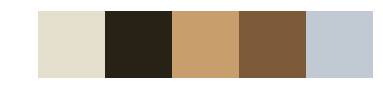

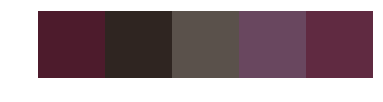

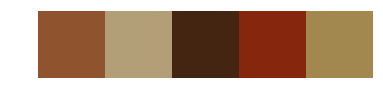

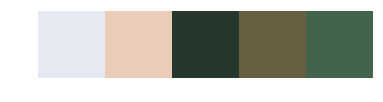

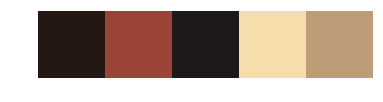

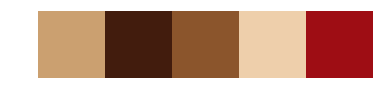

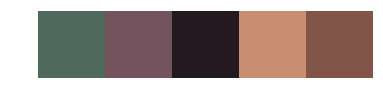

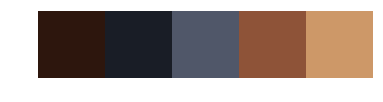

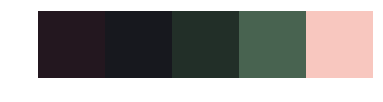

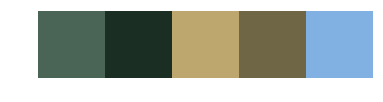

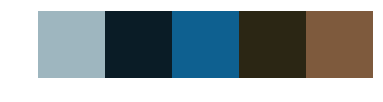

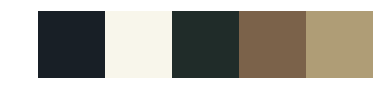

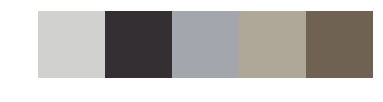

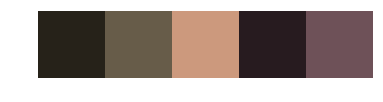

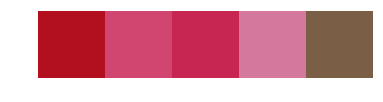

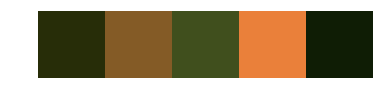

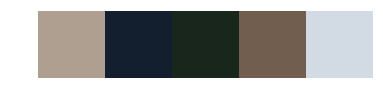

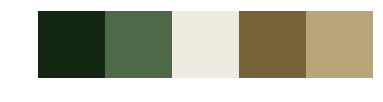

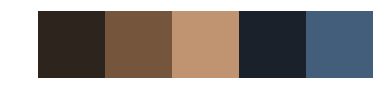

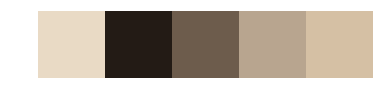

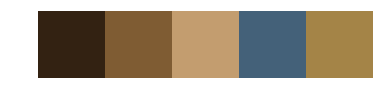

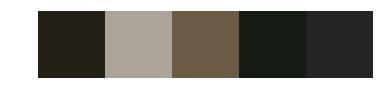

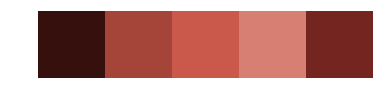

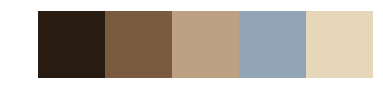

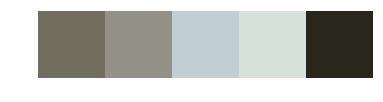

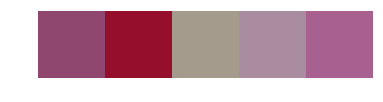

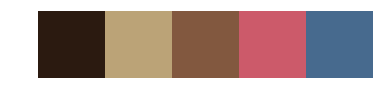

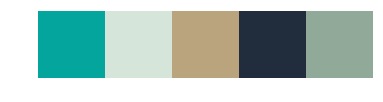

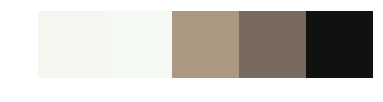

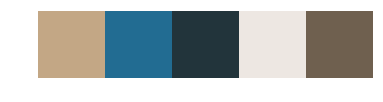

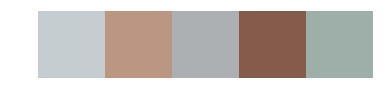

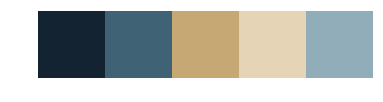

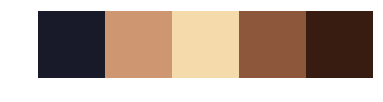

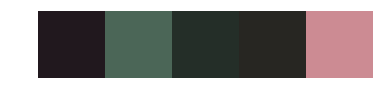

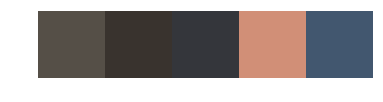

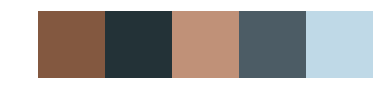

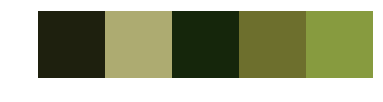

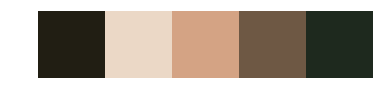

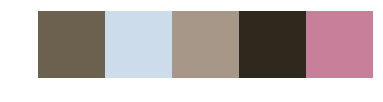

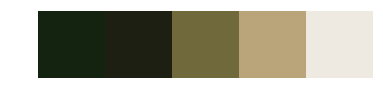

In [94]:
color_nourishknoxville = pd.read_csv("./Instagram/colors_nourishknoxville.csv", index_col = 0, converters={"Color1": ast.literal_eval,
                                                                                                 "Color2": ast.literal_eval,
                                                                                                 "Color3": ast.literal_eval,
                                                                                                 "Color4": ast.literal_eval,
                                                                                                 "Color5": ast.literal_eval,
                                                                                                 "HSL1": ast.literal_eval,
                                                                                                 "HSL2": ast.literal_eval,
                                                                                                 "HSL3": ast.literal_eval,
                                                                                                 "HSL4": ast.literal_eval,
                                                                                                 "HSL5": ast.literal_eval})
color_nourishknoxville_plt = color_nourishknoxville.loc[:, "Color1":"HSL5"]
color_nourishknoxville_plt

cvs = Image.new('RGB',(x*8, y*8))

for i in range(len(color_nourishknoxville_plt)):
    palette = list(color_nourishknoxville_plt.loc[i, "Color1":"Color5"])
    palette = np.array(palette)[np.newaxis, :, :]
    plt.imshow(palette.astype(np.uint8));
    plt.axis('off');
    plt.savefig("./Instagram/nourishknoxville/cpimages/cp_{}".format(i))
    #plt.show();
    
fs = []
for i in range(len(color_nourishknoxville_plt)):
    im = Image.open('./Instagram/nourishknoxville/cpimages/cp_{}.png'.format(i),'r')
    fs.append(im)
    
# get the image size
x,y = fs[0].size

ncol = 9
nrow = 9
cvs = Image.new('RGB',(x*ncol,y*nrow))

for i in range(len(fs)):
    px, py = x*int(i/nrow), y*(i%nrow)
    cvs.paste(fs[i],(px,py))
    
cvs

cvs.save('./Instagram/cp_nourishknoxville.png',format='png')

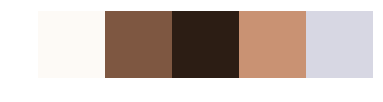

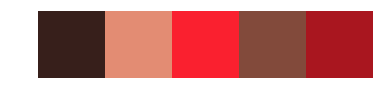

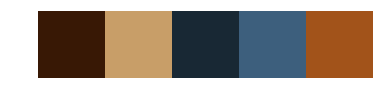

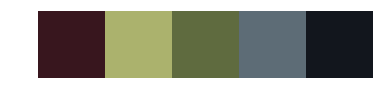

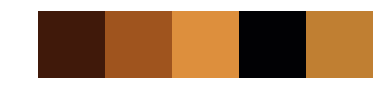

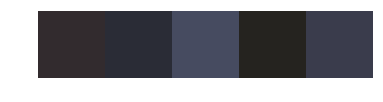

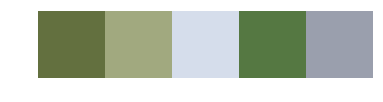

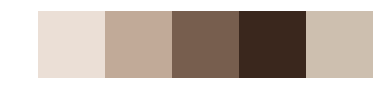

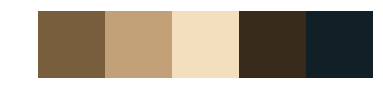

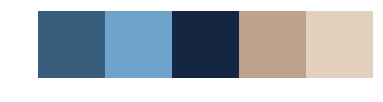

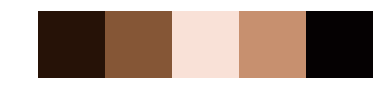

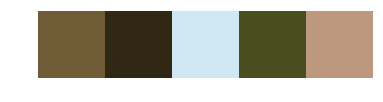

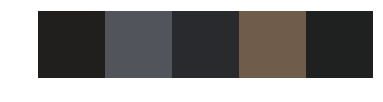

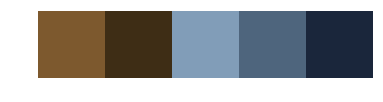

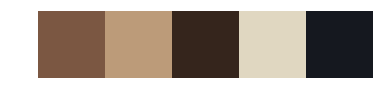

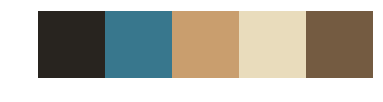

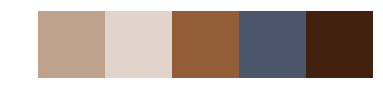

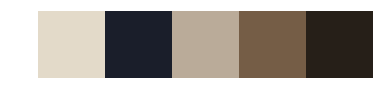

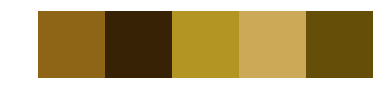

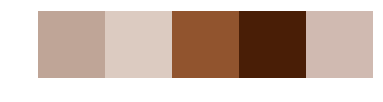

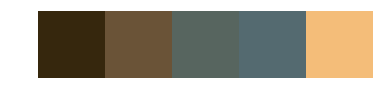

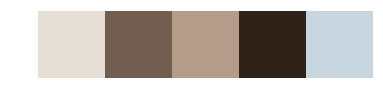

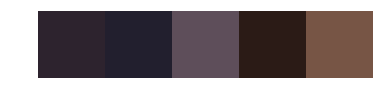

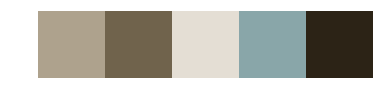

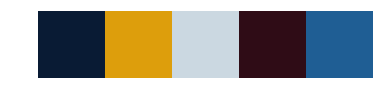

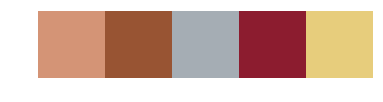

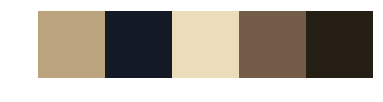

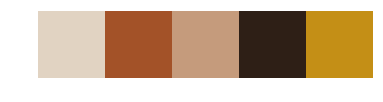

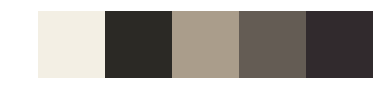

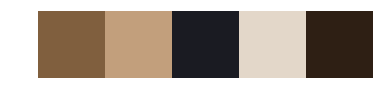

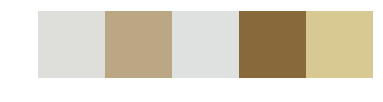

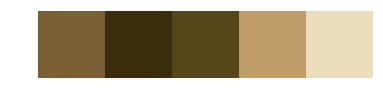

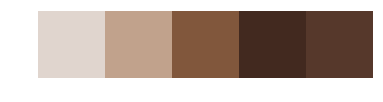

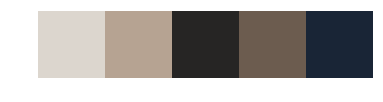

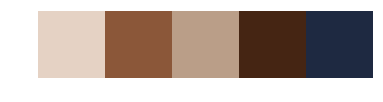

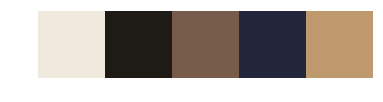

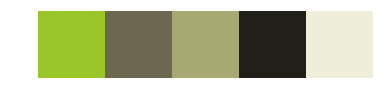

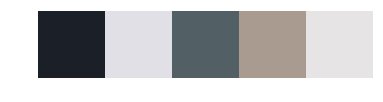

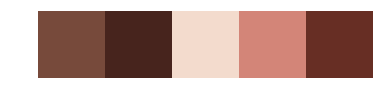

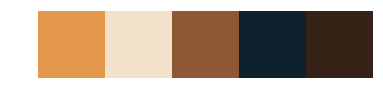

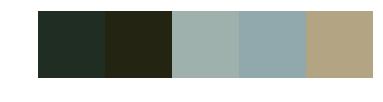

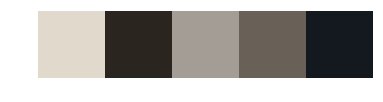

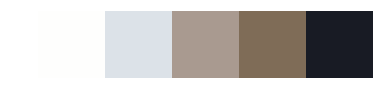

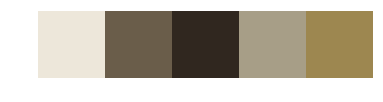

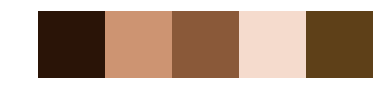

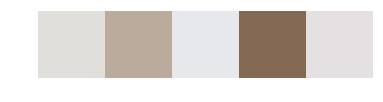

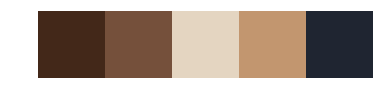

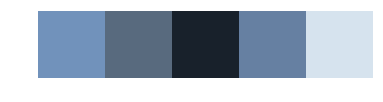

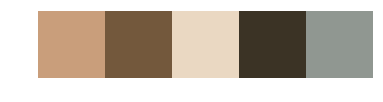

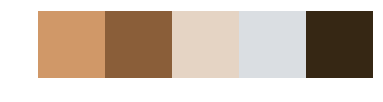

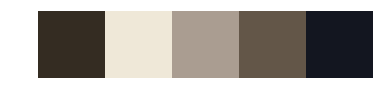

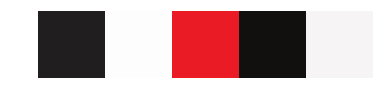

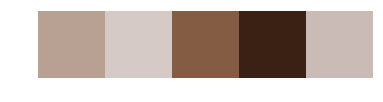

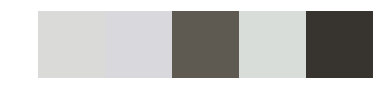

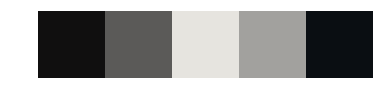

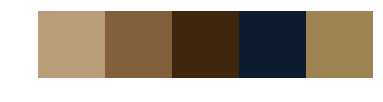

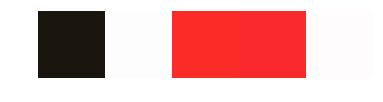

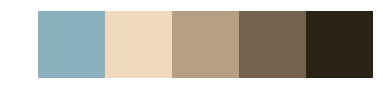

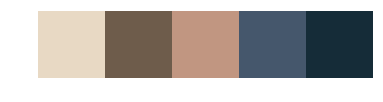

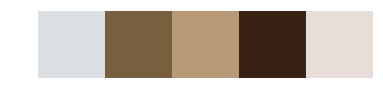

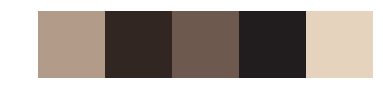

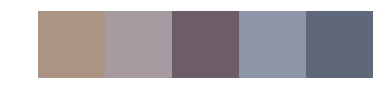

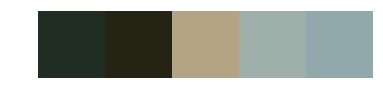

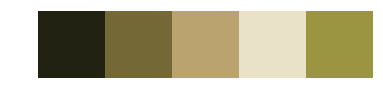

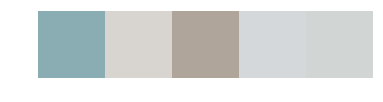

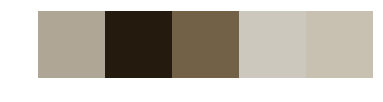

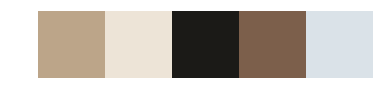

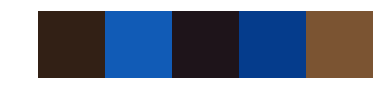

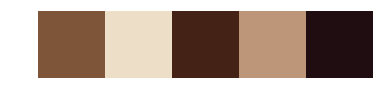

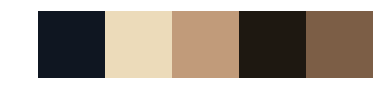

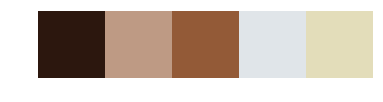

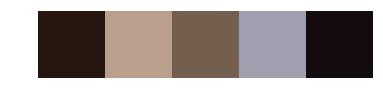

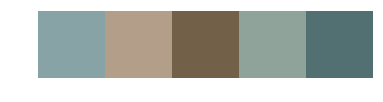

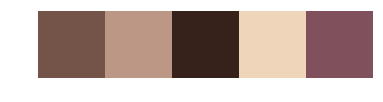

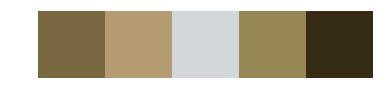

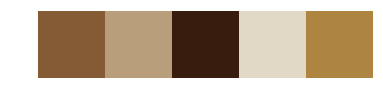

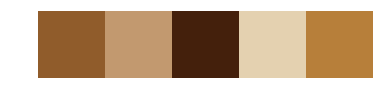

In [92]:
color_knoxcounty = pd.read_csv("./Instagram/colors_knoxcounty.csv", index_col = 0, converters={"Color1": ast.literal_eval,
                                                                                                 "Color2": ast.literal_eval,
                                                                                                 "Color3": ast.literal_eval,
                                                                                                 "Color4": ast.literal_eval,
                                                                                                 "Color5": ast.literal_eval,
                                                                                                 "HSL1": ast.literal_eval,
                                                                                                 "HSL2": ast.literal_eval,
                                                                                                 "HSL3": ast.literal_eval,
                                                                                                 "HSL4": ast.literal_eval,
                                                                                                 "HSL5": ast.literal_eval})
color_knoxcounty_plt = color_knoxcounty.loc[:, "Color1":"HSL5"]
color_knoxcounty_plt

for i in range(len(color_knoxcounty_plt)):
    palette = list(color_knoxcounty_plt.loc[i, "Color1":"Color5"])
    palette = np.array(palette)[np.newaxis, :, :]
    plt.imshow(palette.astype(np.uint8));
    plt.axis('off');
    plt.show();

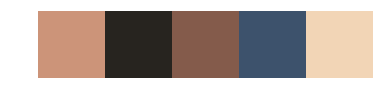

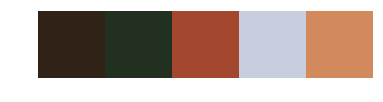

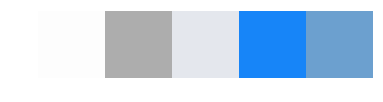

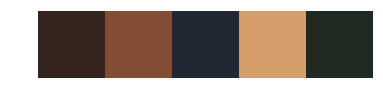

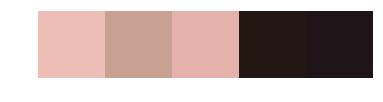

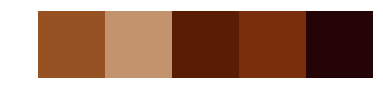

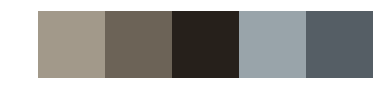

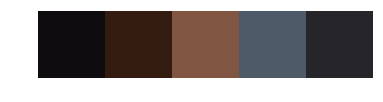

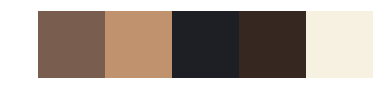

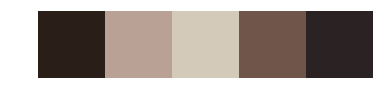

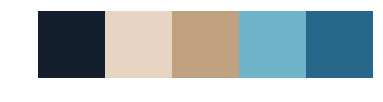

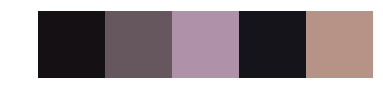

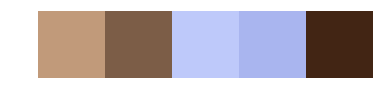

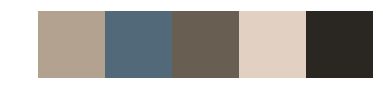

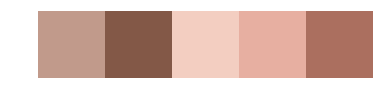

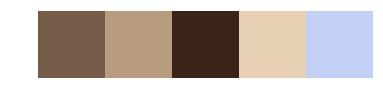

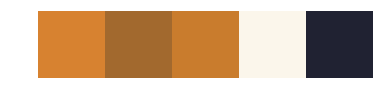

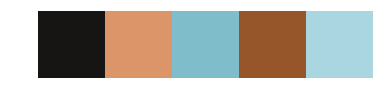

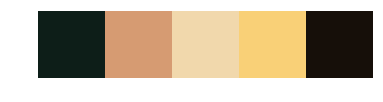

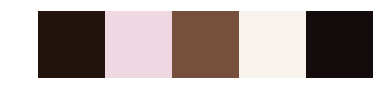

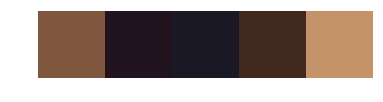

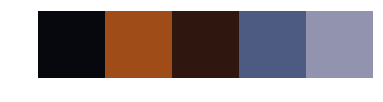

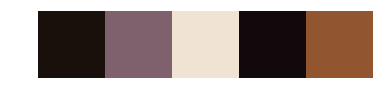

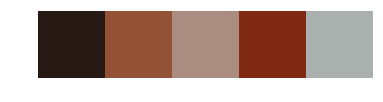

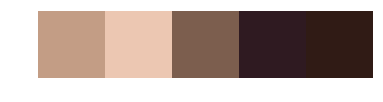

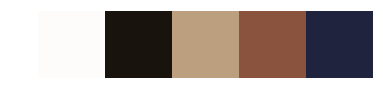

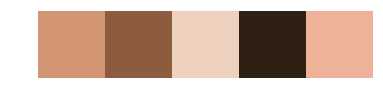

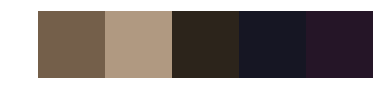

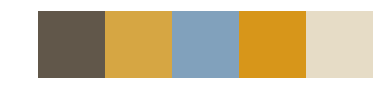

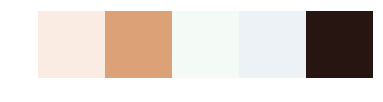

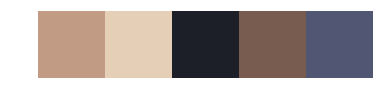

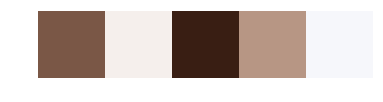

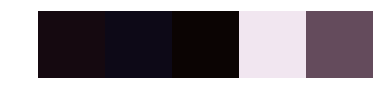

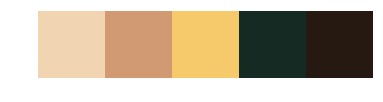

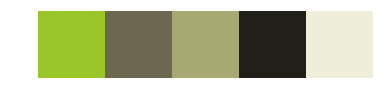

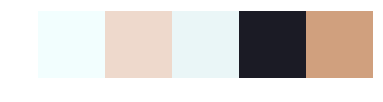

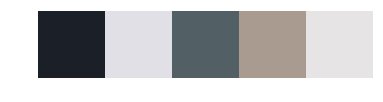

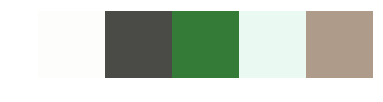

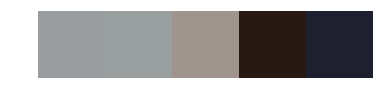

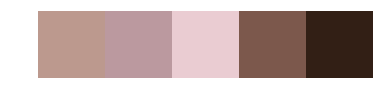

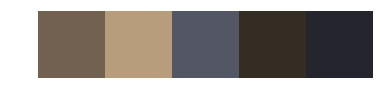

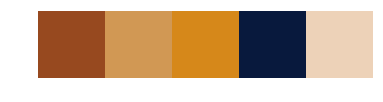

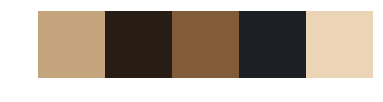

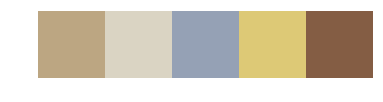

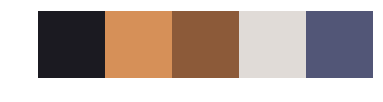

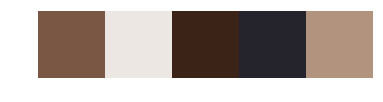

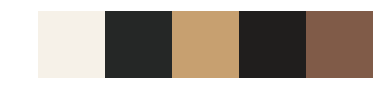

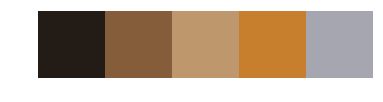

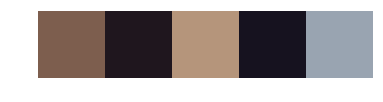

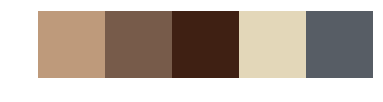

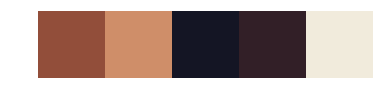

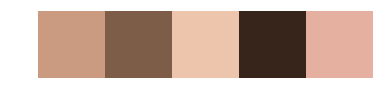

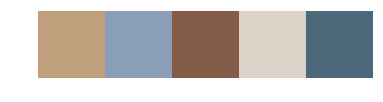

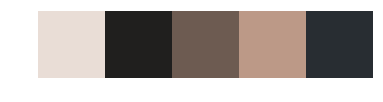

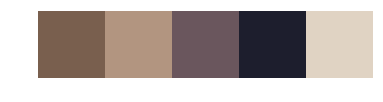

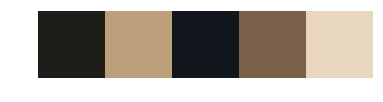

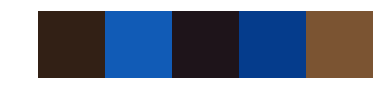

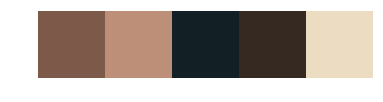

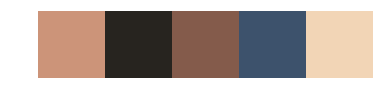

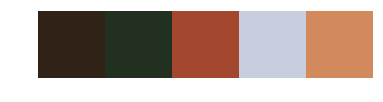

In [93]:
color_utknoxville = pd.read_csv("./Instagram/colors_utknoxville.csv", index_col = 0, converters={"Color1": ast.literal_eval,
                                                                                                 "Color2": ast.literal_eval,
                                                                                                 "Color3": ast.literal_eval,
                                                                                                 "Color4": ast.literal_eval,
                                                                                                 "Color5": ast.literal_eval,
                                                                                                 "HSL1": ast.literal_eval,
                                                                                                 "HSL2": ast.literal_eval,
                                                                                                 "HSL3": ast.literal_eval,
                                                                                                 "HSL4": ast.literal_eval,
                                                                                                 "HSL5": ast.literal_eval})
color_utknoxville_plt = color_utknoxville.loc[:, "Color1":"HSL5"]
color_utknoxville_plt

for i in range(len(color_utknoxville_plt)):
    palette = list(color_utknoxville_plt.loc[i, "Color1":"Color5"])
    palette = np.array(palette)[np.newaxis, :, :]
    plt.imshow(palette.astype(np.uint8));
    plt.axis('off');
    plt.show();

In [64]:
# COLOR-THIEF

for i in range(len(filenames)):
    # Retrieve all paths of jpegs in a directory
    pathlist = Path("./Instagram/{}".format(filenames[i])).glob('**/*.jpg')
    
    # Extract a color palette for each image
    for path in pathlist:
        color_thief = ColorThief(path)
        palette = color_thief.get_palette(color_count=5, quality=1)
        color_Holder = color_Holder.append(pd.Series([str(path), palette[0], palette[1], palette[2], palette[3], palette[4]], index=color_Holder.columns), ignore_index = True)
    
    color_Holder.to_csv("./Instagram/colors_{}.csv".format(filenames[i]))
    color_Holder = pd.DataFrame(columns = ["Image", "Color1", "Color2", "Color3", "Color4", "Color5"])
#    color_Average = color_Average.append(pd.Series([
#                                                    "{}".format(communities[i]),
#                                                    tuple(map(np.median, zip(*color_Holder["Color1"]))),
#                                                    tuple(map(np.median, zip(*color_Holder["Color2"]))),
#                                                    tuple(map(np.median, zip(*color_Holder["Color3"])))],
#                                                    index = color_Average.columns),
#                                                    ignore_index = True)
#    
#    color_Average.to_csv("./Instagram/color_Median.csv")

KeyboardInterrupt: 

In [115]:
color_Average = pd.read_csv("./Instagram/color_Average.csv", index_col = 0, converters={"Color1": ast.literal_eval,
                                                                                        "Color2": ast.literal_eval,
                                                                                        "Color3": ast.literal_eval,
                                                                                        "Color4": ast.literal_eval,
                                                                                        "Color5": ast.literal_eval,
                                                                                        "Color6": ast.literal_eval,
                                                                                        "Color7": ast.literal_eval,
                                                                                        "Color8": ast.literal_eval,
                                                                                        "Color9": ast.literal_eval})
color_Average_plt = color_Average.loc[:, "Color1":]
color_Average_plt

,Color1,Color2,Color3,Color4,Color5,Color6,Color7,Color8,Color9
0,"(145.3448275862069, 125.15517241379311, 112.63...","(123.32758620689656, 109.65517241379311, 99.32...","(135.05172413793105, 110.72413793103448, 98.68...","(141.8793103448276, 119.75862068965517, 106.82...","(144.27586206896552, 121.05172413793103, 106.0...","(149.44827586206895, 137.22413793103448, 124.8...","(134.39655172413794, 110.77586206896552, 99.81...","(140.58620689655172, 112.10344827586206, 97.56...","(121.96551724137932, 118.72413793103448, 125.2..."
1,"(148.50666666666666, 129.08666666666667, 110.86)","(122.82666666666667, 108.9, 94.73333333333333)","(138.15333333333334, 118.56, 105.55333333333333)","(141.56, 123.35333333333334, 112.87333333333333)","(143.06, 127.37333333333333, 115.62)","(141.30666666666667, 130.02666666666667, 119.6...","(136.14, 120.94666666666667, 113.71333333333334)","(141.14666666666668, 121.26, 115.28)","(122.5, 110.36, 110.82)"
2,"(152.30875576036865, 134.9815668202765, 119.00...","(116.40552995391705, 103.82027649769586, 91.78...","(138.08294930875576, 121.72350230414746, 110.0...","(138.34101382488478, 123.61751152073732, 112.4...","(140.46543778801842, 125.23963133640552, 114.5...","(136.32258064516128, 125.13824884792626, 115.0...","(132.1336405529954, 120.25806451612904, 113.97...","(136.41935483870967, 120.50691244239631, 115.4...","(124.8110599078341, 112.58064516129032, 108.54..."
3,"(149.45578231292518, 132.58503401360545, 117.4...","(120.13945578231292, 106.43537414965986, 94.35...","(135.4421768707483, 118.6360544217687, 106.258...","(138.06462585034015, 120.85714285714286, 107.2...","(137.56462585034015, 122.19047619047619, 110.1...","(136.91156462585033, 124.93197278911565, 114.2...","(136.35714285714286, 122.9625850340136, 114.97...","(137.14625850340136, 122.85034013605443, 116.9...","(123.12925170068027, 117.19047619047619, 113.5..."
4,"(149.23243243243243, 132.87297297297297, 118.6...","(116.14864864864865, 102.53513513513514, 91.15...","(137.68648648648647, 117.76216216216216, 105.4...","(139.98108108108107, 121.15135135135135, 107.8...","(137.15675675675675, 122.14864864864865, 110.1...","(137.4027027027027, 125.19189189189188, 114.78...","(136.87567567567567, 123.3, 114.97027027027028)","(137.47027027027028, 124.49459459459459, 119.5...","(124.31351351351351, 118.08648648648649, 113.4..."
5,"(146.69882352941175, 132.46117647058824, 119.6...","(117.34117647058824, 105.57176470588236, 95.56...","(132.75058823529412, 115.59294117647059, 103.7...","(138.69882352941175, 122.17411764705882, 109.8...","(133.8235294117647, 121.17411764705882, 110.28...","(137.3435294117647, 126.60235294117648, 116.48...","(135.9764705882353, 124.00941176470589, 115.52...","(135.04235294117646, 124.6470588235294, 119.59...","(124.66588235294118, 118.38823529411765, 112.3..."
6,"(149.97029702970298, 134.94653465346533, 121.9...","(114.45148514851485, 104.13465346534653, 93.49...","(131.84158415841586, 115.17029702970297, 103.4...","(138.22772277227722, 121.99009900990099, 109.3...","(133.55643564356436, 122.03366336633664, 110.9...","(137.02178217821782, 126.48514851485149, 116.2...","(134.51881188118813, 122.74257425742574, 114.1...","(135.67524752475248, 124.51881188118811, 119.3...","(126.46930693069307, 118.02376237623763, 110.3..."
7,"(148.38754325259515, 133.13667820069205, 119.8...","(115.96885813148789, 105.33910034602076, 94.41...","(134.11245674740485, 116.31487889273356, 103.5...","(138.76989619377161, 121.94290657439447, 108.1...","(135.35640138408306, 123.5795847750865, 111.22...","(136.49134948096886, 125.30622837370242, 114.1...","(136.30622837370242, 123.13148788927336, 113.7...","(137.36332179930795, 125.17474048442907, 119.1...","(124.63148788927336, 118.56920415224913, 110.4..."
8,"(146.9088, 131.4192, 118.4864)","(115.9344, 105.9184, 95.8672)","(134.1168, 116.8976, 104.6192)","(138.0704, 122.1744, 109.432)","(134.3968, 122.8832, 111.4688)","(136.3648, 125.0608, 114.1744)","(134.952, 122.5168, 113.5568)","(136.3

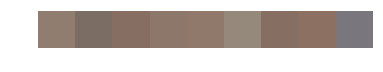

In [122]:
palette = list(color_Average_plt.loc[0, "Color1":])
palette = np.array(palette)[np.newaxis, :, :]
plt.imshow(palette.astype(np.uint8));
plt.axis('off');
plt.show();

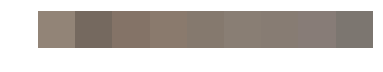

In [132]:
palette = list(color_Average_plt.loc[5, "Color1":])
palette = np.array(palette)[np.newaxis, :, :]
plt.imshow(palette.astype(np.uint8));
plt.axis('off');
plt.show();

In [29]:
colors = colorgram.extract('./Instagram/utknoxville/67121638_205915543730104_2489821481561388853_n.jpg', 10)
colors[0].rgb

Rgb(r=204, g=148, b=121)

In [34]:
color_HolderUTK = pd.DataFrame(columns = ["Color1", "Color2", "Color3", "Color4", "Color5", "Color6", "HSL1", "HSL2", "HSL3", "HSL4", "HSL5", "HSL6", "Proportion1", "Proportion2", "Proportion3", "Proportion4", "Proportion5", "Proportion6"])

color_HolderUTK = color_HolderUTK.append(pd.Series([colors[0].rgb, colors[1].rgb, colors[2].rgb, colors[3].rgb, colors[4].rgb, colors[5].rgb, 
                                              colors[0].hsl, colors[1].hsl, colors[2].hsl, colors[3].hsl, colors[4].hsl, colors[5].hsl,
                                              colors[0].proportion, colors[1].proportion, colors[2].proportion, colors[3].proportion, colors[4].proportion, colors[5].proportion],
                                             index=color_HolderUTK.columns), ignore_index = True) 
print(color_HolderUTK)


            Color1        Color2         Color3         Color4  \
0  (204, 148, 121)  (39, 36, 31)  (132, 91, 75)  (61, 82, 108)   

            Color5        Color6            HSL1          HSL2           HSL3  \
0  (242, 213, 182)  (31, 37, 46)  (13, 114, 162)  (26, 29, 35)  (11, 70, 103)   

            HSL4            HSL5           HSL6  Proportion1  Proportion2  \
0  (151, 70, 84)  (21, 177, 212)  (153, 49, 38)     0.312477     0.171797   

   Proportion3  Proportion4  Proportion5  Proportion6  
0     0.156483     0.109238     0.078407     0.065242  


In [39]:
### UNIVERSITY OF TENNESSEE, KNOXVILLE
color_utk = pd.DataFrame(columns = ["Color1", "Color2", "Color3", "Color4", "Color5", "Color6", "HSL1", "HSL2", "HSL3", "HSL4", "HSL5", "HSL6", "Proportion1", "Proportion2", "Proportion3", "Proportion4", "Proportion5", "Proportion6"])
pathlist = Path("./Instagram/{}".format(filenames[0])).glob('**/*.jpg')
    
# Extract a color palette for each image
for path in pathlist:
    colors = colorgram.extract(path, 6)
    color_utk = color_utk.append(pd.Series([colors[0].rgb, colors[1].rgb, colors[2].rgb, colors[3].rgb, colors[4].rgb, colors[5].rgb, 
                                              colors[0].hsl, colors[1].hsl, colors[2].hsl, colors[3].hsl, colors[4].hsl, colors[5].hsl,
                                              colors[0].proportion, colors[1].proportion, colors[2].proportion, colors[3].proportion, colors[4].proportion, colors[5].proportion],
                                              index=color_utk.columns), ignore_index = True)

color_utk.to_csv("./Instagram/color_Median_UTK.csv")
    
color_Average = color_Average.append(pd.Series([
                                                    tuple(map(np.median, zip(*color_utk["Color1"]))),
                                                    tuple(map(np.median, zip(*color_utk["Color2"]))),
                                                    tuple(map(np.median, zip(*color_utk["Color3"]))),
                                                    tuple(map(np.median, zip(*color_utk["Color4"]))),
                                                    tuple(map(np.median, zip(*color_utk["Color5"]))),
                                                    tuple(map(np.median, zip(*color_utk["Color6"]))),
                                                    tuple(map(np.median, zip(*color_utk["HSL1"]))),
                                                    tuple(map(np.median, zip(*color_utk["HSL2"]))),
                                                    tuple(map(np.median, zip(*color_utk["HSL3"]))),
                                                    tuple(map(np.median, zip(*color_utk["HSL4"]))),
                                                    tuple(map(np.median, zip(*color_utk["HSL5"]))),
                                                    tuple(map(np.median, zip(*color_utk["HSL6"])))],
                                                    index = color_Average.columns),
                                                    ignore_index = True)
    
color_Average.to_csv("./Instagram/color_Median.csv")

In [54]:
### UNIVERSITY OF TENNESSEE, KNOXVILLE GEOGRAPHY
color_utkgeography = pd.DataFrame(columns = ["Color1", "Color2", "Color3", "Color4", "Color5", "Color6", "HSL1", "HSL2", "HSL3", "HSL4", "HSL5", "HSL6", "Proportion1", "Proportion2", "Proportion3", "Proportion4", "Proportion5", "Proportion6"])
pathlist = Path("./Instagram/{}".format(filenames[1])).glob('**/*.jpg')
    
# Extract a color palette for each image
for path in pathlist:
    colors = colorgram.extract(path, 6)
    color_utkgeography = color_utkgeography.append(pd.Series([colors[0].rgb, colors[1].rgb, colors[2].rgb, colors[3].rgb, colors[4].rgb, colors[5].rgb, 
                                                              colors[0].hsl, colors[1].hsl, colors[2].hsl, colors[3].hsl, colors[4].hsl, colors[5].hsl,
                                                              colors[0].proportion, colors[1].proportion, colors[2].proportion, colors[3].proportion, colors[4].proportion, colors[5].proportion],
                                                              index=color_utkgeography.columns), ignore_index = True)

color_utkgeography.to_csv("./Instagram/color_Median_{}.csv".format(communities[1]))
    
color_Average = color_Average.append(pd.Series([
                                                    tuple(map(np.median, zip(*color_utkgeography["Color1"]))),
                                                    tuple(map(np.median, zip(*color_utkgeography["Color2"]))),
                                                    tuple(map(np.median, zip(*color_utkgeography["Color3"]))),
                                                    tuple(map(np.median, zip(*color_utkgeography["Color4"]))),
                                                    tuple(map(np.median, zip(*color_utkgeography["Color5"]))),
                                                    tuple(map(np.median, zip(*color_utkgeography["Color6"]))),
                                                    tuple(map(np.median, zip(*color_utkgeography["HSL1"]))),
                                                    tuple(map(np.median, zip(*color_utkgeography["HSL2"]))),
                                                    tuple(map(np.median, zip(*color_utkgeography["HSL3"]))),
                                                    tuple(map(np.median, zip(*color_utkgeography["HSL4"]))),
                                                    tuple(map(np.median, zip(*color_utkgeography["HSL5"]))),
                                                    tuple(map(np.median, zip(*color_utkgeography["HSL6"])))],
                                                    index = color_Average.columns),
                                                    ignore_index = True)
    
color_Average.to_csv("./Instagram/color_Median.csv")

[<colorgram.py Color: Rgb(r=240, g=129, b=50), 76.66057698883341%>, <colorgram.py Color: Rgb(r=253, g=249, b=242), 16.823142078371223%>, <colorgram.py Color: Rgb(r=248, g=254, b=253), 3.5824890825428146%>, <colorgram.py Color: Rgb(r=254, g=252, b=254), 1.809318184038531%>, <colorgram.py Color: Rgb(r=249, g=252, b=254), 1.0248243925790599%>, <colorgram.py Color: Rgb(r=233, g=190, b=145), 0.09964927363495149%>]
[<colorgram.py Color: Rgb(r=247, g=246, b=240), 65.950403475805%>, <colorgram.py Color: Rgb(r=88, g=88, b=91), 12.929714084437451%>, <colorgram.py Color: Rgb(r=174, g=188, b=104), 10.229462420089796%>, <colorgram.py Color: Rgb(r=89, g=89, b=84), 5.66938094395647%>, <colorgram.py Color: Rgb(r=197, g=210, b=128), 2.6451054551713917%>, <colorgram.py Color: Rgb(r=245, g=244, b=248), 2.575933620539891%>]
[<colorgram.py Color: Rgb(r=191, g=163, b=113), 31.36381636609668%>, <colorgram.py Color: Rgb(r=112, g=102, b=71), 31.27870335440983%>, <colorgram.py Color: Rgb(r=237, g=228, b=204), 1

IndexError: list index out of range